<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/UniversalBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Machine Project-Universal_Bank

### About Dataset:

Content....

Column descriptions ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income :Annual income of the customer ($000)

ZIPCode: Home Address ZIP code

Family: Family size of the customer

CCAvg Avg: spending on credit cards per month ($000)

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage if any. ($000)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

CreditCard: Does the customer uses a credit card issued by UniversalBank?


## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get Dataset

https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling

## Read Dataset

In [3]:
df=pd.read_csv('UniversalBank.csv')

## EDA

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.shape

(5000, 14)

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


##Clean Data


In [10]:
df = df.drop(['ZIP Code','ID'],axis= 1)

In [11]:
df.shape

(5000, 12)

In [12]:
X = df.drop('CreditCard',axis = 1)
y = df['CreditCard']

## Visualization

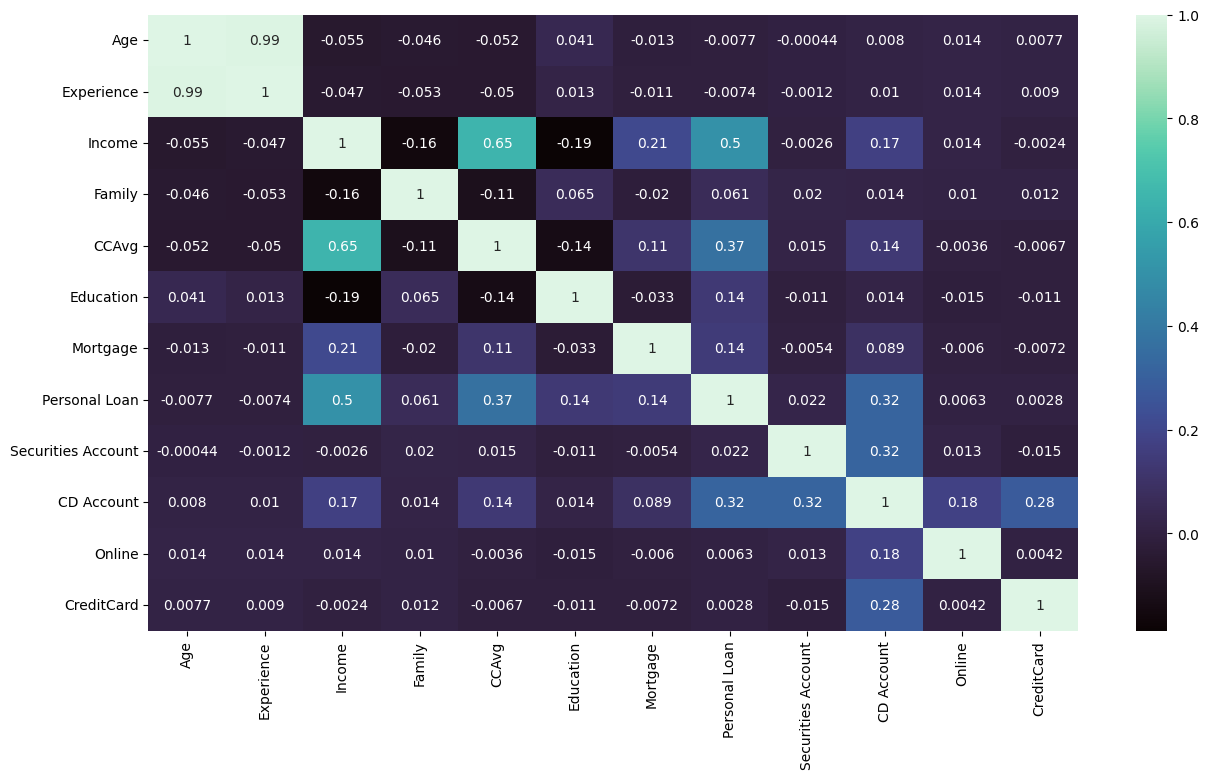

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap='mako')
plt.show()

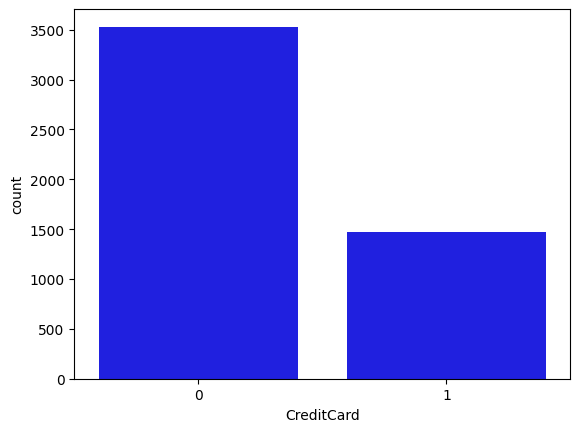

In [14]:
sns.countplot(data=df,x='CreditCard',color='blue');

## Scale Data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_sc= sc.fit_transform(X)

In [18]:
X_sc

array([[-1.77441684, -1.66607847, -0.53822878, ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-0.02952359, -0.09633022, -0.8641094 , ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-0.55299157, -0.44516316, -1.36379301, ..., -0.34142334,
        -0.25354028, -1.21661774],
       ...,
       [ 1.54088033,  1.64783451, -1.08136314, ..., -0.34142334,
        -0.25354028, -1.21661774],
       [ 1.71536965,  1.73504275, -0.53822878, ..., -0.34142334,
        -0.25354028,  0.82195086],
       [-1.51268285, -1.40445376,  0.20043396, ..., -0.34142334,
        -0.25354028,  0.82195086]])

In [19]:
X = pd.DataFrame(X_sc,columns = [ 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online'])

## Tarin Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size= 0.3)

## Train the Support Vector Classifier

In [22]:
from sklearn.svm import SVC

In [23]:
model = SVC()

In [24]:
model.fit(X_train,y_train)

SVC()

In [25]:
y_pred=model.predict(X_test)

## Evaluation

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

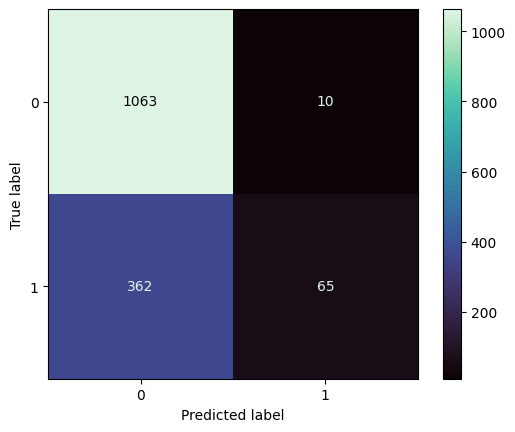

In [27]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot(cmap='mako')

In [28]:
print(cm)
print(cr)

[[1063   10]
 [ 362   65]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1073
           1       0.87      0.15      0.26       427

    accuracy                           0.75      1500
   macro avg       0.81      0.57      0.56      1500
weighted avg       0.78      0.75      0.68      1500



## Gridsearch

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid={'C': [1],'kernel': ['rbf','linear','poly','sigmoid']}

In [31]:
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=5)

In [32]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [33]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

## Evaluation Gridsearch    
### c=1 , kernel = rbf

In [34]:
pred = grid.predict(X_test)

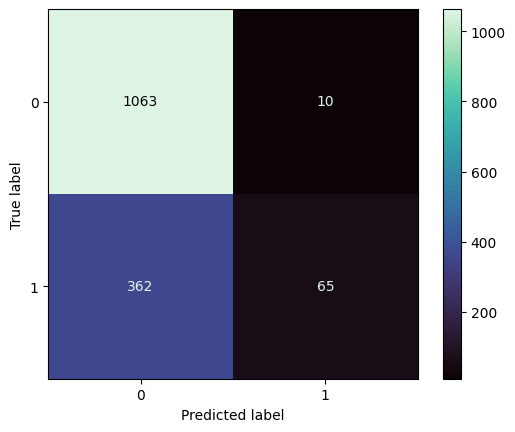

In [35]:
cm = confusion_matrix(y_test,pred)
cr = classification_report(y_test,pred)
dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot(cmap='mako');

In [36]:
print(cm)
print(cr)

[[1063   10]
 [ 362   65]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1073
           1       0.87      0.15      0.26       427

    accuracy                           0.75      1500
   macro avg       0.81      0.57      0.56      1500
weighted avg       0.78      0.75      0.68      1500



### c=100 , kernel = rbf

In [37]:
param_grid={'C': [100],'kernel': ['rbf']}

In [38]:
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=5)

In [39]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [100], 'kernel': ['rbf']})

In [40]:
pred = grid.predict(X_test)

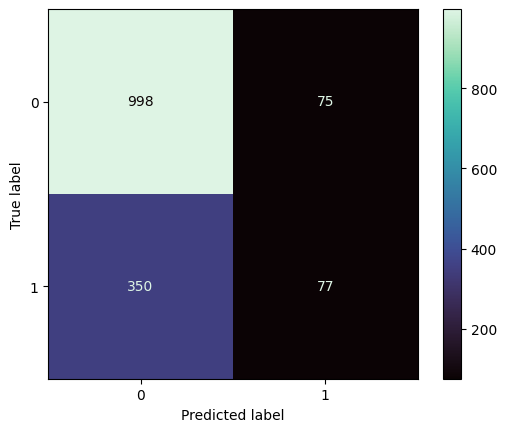

In [41]:
cm = confusion_matrix(y_test,pred)
cr = classification_report(y_test,pred)
dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot(cmap='mako');

In [42]:
print(cm)
print(cr)

[[998  75]
 [350  77]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      1073
           1       0.51      0.18      0.27       427

    accuracy                           0.72      1500
   macro avg       0.62      0.56      0.55      1500
weighted avg       0.67      0.72      0.67      1500



## Conclusion:

For both values of c, the model performs better in terms of precision, recall, and F1-Score for Class 0 compared to Class 1.

The model with c=1 achieves higher precision and recall for Class 1 but at the cost of lower precision and recall for Class 0.

The model with c=100 has better precision and recall for Class 0 but lower performance for Class 1.

The accuracy is higher for c=1, indicating that this model is generally better at correctly classifying instances.

In summary, the model with c=1 and the rbf kernel appears to have a better overall performance for this binary classification task. However, depending on the specific goals and requirements, one might need to consider the trade-off between precision and recall for each class when selecting the hyperparameter values.